# Eta on Rational Curves

In [1]:
from hypersurface import *
import sympy as sp
from pprint import pprint
import time as t
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [2]:
z0, z1, z2, z3, z4= sp.symbols('z0, z1, z2, z3, z4')
Z = [z0,z1,z2,z3,z4]
q = z0**5 + z1**5 + z2**5 + z3**5 + z4**5
Quintic = Hypersurface(Z, q, 100)

In [3]:
k = 3
sections_1, ns_1 = Quintic.get_sections(k)

In [4]:
J = []
for z in Z:
    J.append([diff(s,z) for s in sections_1])
J = np.array(J)

In [5]:
J

array([[3*z0**2, 2*z0*z1, 2*z0*z2, 2*z0*z3, 2*z0*z4, z1**2, z1*z2, z1*z3,
        z1*z4, z2**2, z2*z3, z2*z4, z3**2, z3*z4, z4**2, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, z0**2, 0, 0, 0, 2*z0*z1, z0*z2, z0*z3, z0*z4, 0, 0, 0, 0, 0,
        0, 3*z1**2, 2*z1*z2, 2*z1*z3, 2*z1*z4, z2**2, z2*z3, z2*z4,
        z3**2, z3*z4, z4**2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, z0**2, 0, 0, 0, z0*z1, 0, 0, 2*z0*z2, z0*z3, z0*z4, 0, 0,
        0, 0, z1**2, 0, 0, 2*z1*z2, z1*z3, z1*z4, 0, 0, 0, 3*z2**2,
        2*z2*z3, 2*z2*z4, z3**2, z3*z4, z4**2, 0, 0, 0, 0],
       [0, 0, 0, z0**2, 0, 0, 0, z0*z1, 0, 0, z0*z2, 0, 2*z0*z3, z0*z4,
        0, 0, 0, z1**2, 0, 0, z1*z2, 0, 2*z1*z3, z1*z4, 0, 0, z2**2, 0,
        2*z2*z3, z2*z4, 0, 3*z3**2, 2*z3*z4, z4**2, 0],
       [0, 0, 0, 0, z0**2, 0, 0, 0, z0*z1, 0, 0, z0*z2, 0, z0*z3,
        2*z0*z4, 0, 0, 0, z1**2, 0, 0, z1*z2, 0, z1*z3, 2*z1*z4, 0, 0,
        z2**2, 0, z2*z3, 2*z2*z4, 0, z3**2, 2*z3*z4, 3*z4**2]],

In [8]:
restriction = Quintic.patches[0].patches[0].get_restriction()

In [9]:
restriction

Matrix([
[-z2**4/z1**4, -z3**4/z1**4, -z4**4/z1**4],
[           1,            0,            0],
[           0,            1,            0],
[           0,            0,            1]])

In [10]:
Quintic.list_patches()

Number of Patches: 5
Points in patch 1 : 89
Points in patch 2 : 99
Points in patch 3 : 111
Points in patch 4 : 107
Points in patch 5 : 94


In [11]:
H = np.identity(ns_1)

In [12]:
theta, phi = np.linspace(0.0001,np.pi+0.0001, 40), np.linspace(0.0001, 2*np.pi+0.0001, 40)
ts = []
for j in phi:
    for i in theta:
        T = complex(math.sin(i)*math.sin(j), math.cos(i))/(sin(i)*cos(j))
        if mp.fabs(T)>=1:
            ts.append(1/T)
        else:
            ts.append(T) 

In [14]:
FS_Vol_Form_Q = []
start_time = t.time()
sec1 = sp.lambdify(Z,sections_1)
rest1 = sp.lambdify(Z,restriction)
J1 = J[1:]
#J1[0] = np.zeros(ns_1)
js1 = sp.lambdify(Z,J1)
for tt in ts:
    zz = [1,-1,tt,0,-tt]
    zz_bar = [conj(z) for z in zz]
    s = np.array(sec1(*zz)).reshape(1,-1)
    s_dag = np.array(sec1(*zz_bar)).reshape(-1,1)
    j = np.array(js1(*zz))
    j_dag = np.array(js1(*zz_bar)).T
    alpha = np.matmul(s,np.matmul(H,s_dag))
    A = np.matmul(j,np.matmul(H,j_dag))
    B = np.matmul(j,np.matmul(H,np.matmul(s_dag,np.matmul(s,np.matmul(H,j_dag)))))
    G = A/alpha - (B/alpha**2)
    R = np.array(rest1(*zz))
    R_dag = np.array(rest1(*zz_bar)).T
    V = np.matmul(R_dag,np.matmul(G,R))
    V = np.matrix(V,dtype=complex)
    FS_Vol_Form_Q.append(np.linalg.det(V))
print("Time: ",(t.time()-start_time))

Time:  116.85142397880554


In [15]:
OO_Bar = Quintic.get_omega_omegabar()

In [16]:
oob = sp.lambdify(Z,OO_Bar[0][0])

In [17]:
oo_bar = [oob(*[1,-1,tt,0,-tt]) for tt in ts]

In [18]:
eta_1 = np.divide(np.array(FS_Vol_Form_Q),np.array(oo_bar))

In [19]:
R = [eta_1[i*40:(i+1)*40] for i in range(40)]
R = np.asarray(R,dtype=float)

/Users/nannu/anaconda3/envs/ML/lib/python3.8/site-packages/numpy/core/_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


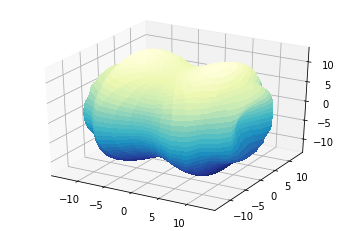

In [20]:
THETA, PHI = np.meshgrid(theta, phi)
X = R * np.sin(THETA) * np.cos(PHI)
Y = R * np.sin(THETA) * np.sin(PHI)
Z = R * np.cos(THETA)
fig = plt.figure()
ax = fig.add_subplot(1,1,1, projection='3d')
plot = ax.plot_surface(
    X, Y, Z, rstride=1, cstride=1, cmap=plt.cm.YlGnBu_r,
    linewidth=0, antialiased=False)

plt.show()

In [19]:
Quintic.patches[0].patches[0].omega_omegabar

1/(25*z1**4*conjugate(z1)**4)